# Import and Read

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('Books_Data_Clean.csv')
df.shape

(1070, 15)

In [45]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# Cleaning

In [46]:
df = df.drop('index', axis = 1)

In [47]:
df.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [48]:
df.dtypes

Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

In [49]:
df = df.rename(columns={'Publishing Year' : 'Publishing_Year',
                   'Book Name' : 'Book_Name',
                   'language_code' : 'Language',
                   'Book_average_rating' : 'Average_Rating',
                   'Book_ratings_count' : 'Ratings',
                   'genre' : 'Genre',
                   'gross sales' : 'Gross_Sales',
                   'publisher revenue' : 'Publisher_Revenue',
                   'sale price' : 'Sales_Price',
                   'sales rank' : 'Sales_Rank',
                   'Publisher ' : 'Publisher',
                   'units sold' : 'Units_Sold'})
df.columns

Index(['Publishing_Year', 'Book_Name', 'Author', 'Language', 'Author_Rating',
       'Average_Rating', 'Ratings', 'Genre', 'Gross_Sales',
       'Publisher_Revenue', 'Sales_Price', 'Sales_Rank', 'Publisher',
       'Units_Sold'],
      dtype='object')

In [51]:
df.describe()

,Publishing_Year,Average_Rating,Ratings,Gross_Sales,Publisher_Revenue,Sales_Price,Sales_Rank,Units_Sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [50]:
 df = df[df['Publishing_Year'] > 1900]

In [55]:
df.isna().sum()

Publishing_Year       0
Book_Name             0
Author                0
Language             47
Author_Rating         0
Average_Rating        0
Ratings               0
Genre                 0
Gross_Sales           0
Publisher_Revenue     0
Sales_Price           0
Sales_Rank            0
Publisher             0
Units_Sold            0
dtype: int64

In [54]:
df.dropna(subset = 'Book_Name',inplace = True)

In [64]:
df.nunique()

Publishing_Year      101
Book_Name            987
Author               669
Language               5
Author_Rating          4
Average_Rating       133
Ratings              983
Genre                  3
Gross_Sales          774
Publisher_Revenue    570
Sales_Price          143
Sales_Rank           818
Publisher              9
Units_Sold           470
dtype: int64

In [60]:
df['Genre'].unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

In [59]:
df['Genre'] = df['Genre'].replace({'genre fiction' : 'fiction'}) 

In [66]:
df['Language'].unique()

array(['English', 'Unknown', 'Spanish', 'French', 'Dutch', 'Arabic'],
      dtype=object)

In [101]:
df["Language"] = df["Language"].replace({
    "en-US": "English",
    "en-GB": "English",
    "en-CA": "English",
    "eng": "English",
    "fre": "French",
    "spa": "Spanish",
    "ara": "Arabic",
    "nl": "Dutch"
})


In [102]:
df["Language"] = df["Language"].fillna("Unknown")


In [126]:
df['Publisher'] = df['Publisher'].replace({'HarperCollins Publishing' : 'HarperCollins Publishers',
                                'HarperCollins Christian Publishing':'HarperCollins Publishers'})

In [127]:
df.head()

,Publishing_Year,Book_Name,Author,Language,Author_Rating,Average_Rating,Ratings,Genre,Gross_Sales,Publisher_Revenue,Sales_Price,Sales_Rank,Publisher,Units_Sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",English,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",English,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,English,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,English,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,English,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [128]:
df.duplicated().sum()

np.int64(0)

# Analyizing Insights

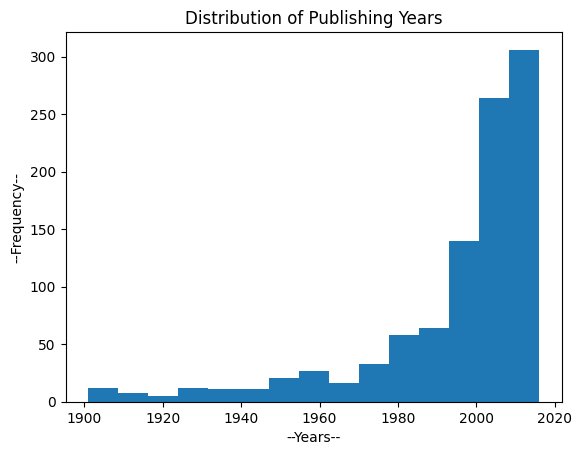

In [129]:
plt.hist(df['Publishing_Year'], bins = 15)
plt.xlabel('--Years--')
plt.ylabel('--Frequency--')
plt.title('Distribution of Publishing Years')
plt.show()

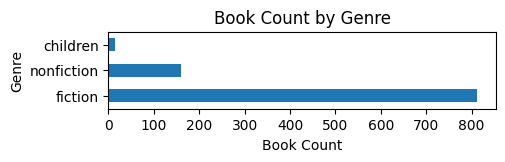

In [130]:
ax = df['Genre'].value_counts().plot(figsize = (5,1), kind = 'barh')
ax.set_xlabel('Book Count')
ax.set_title('Book Count by Genre')
plt.show()

In [131]:
top10_authors = df.groupby('Author')['Average_Rating'].mean().sort_values(ascending = False).head(10)

# Comparisons of Values

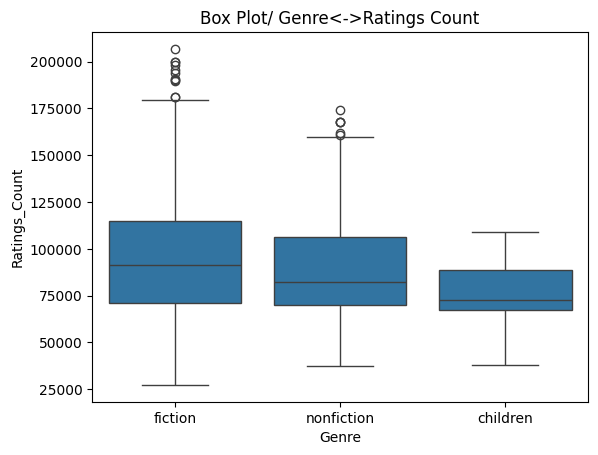

In [132]:
sns.boxplot(data = df, x = 'Genre', y = 'Ratings')
plt.xlabel('Genre')
plt.ylabel('Ratings_Count')
plt.title('Box Plot/ Genre<->Ratings Count')
plt.show()

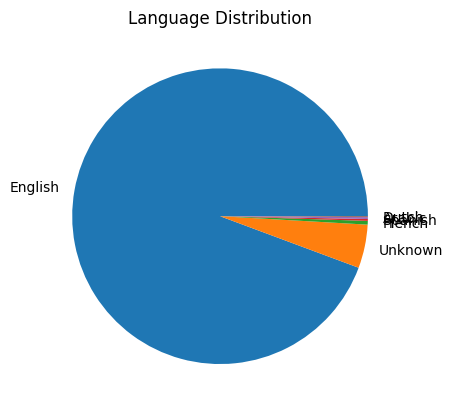

In [133]:
language_dist = df['Language'].value_counts()
plt.pie(language_dist, labels=language_dist.index)
plt.title("Language Distribution")
plt.show()

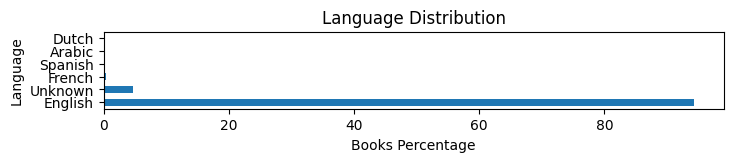

In [134]:
(language_dist / language_dist.sum() * 100).plot(
    kind="barh", figsize=(8,1)
)
plt.xlabel("Books Percentage")
plt.ylabel("Language")
plt.title("Language Distribution")
plt.show()


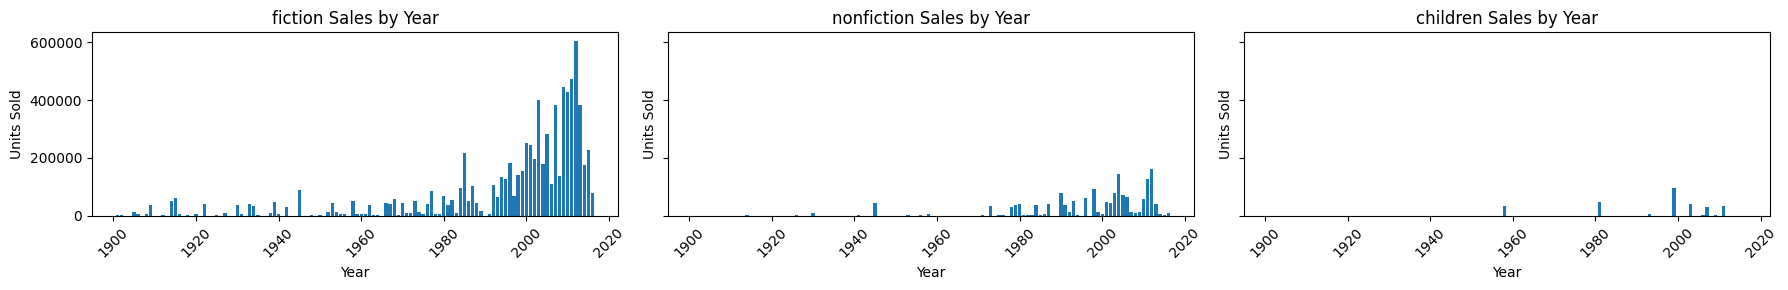

In [158]:
# Step 1: Group by Year & Genre, sum sales
sales_by_genre_year = df.groupby(['Publishing_Year', 'Genre'])['Units_Sold'].sum().reset_index()

# Step 2: Filter for the three genres
genres = ['fiction', 'nonfiction', 'children']
filtered = sales_by_genre_year[sales_by_genre_year['Genre'].isin(genres)]

# Step 3: Pivot table to get Years as index, Genres as columns
pivot_df = filtered.pivot(index='Publishing_Year', columns='Genre', values='Units_Sold').fillna(0)

# Step 4: Plot 3 side-by-side bar graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 3), sharey=True)  # 1 row, 3 columns

for i, genre in enumerate(genres):
    axes[i].bar(pivot_df.index, pivot_df[genre], label=genre)
    axes[i].set_title(f"{genre} Sales by Year")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Units Sold")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Groupings by different factors

In [135]:
df.columns

Index(['Publishing_Year', 'Book_Name', 'Author', 'Language', 'Author_Rating',
       'Average_Rating', 'Ratings', 'Genre', 'Gross_Sales',
       'Publisher_Revenue', 'Sales_Price', 'Sales_Rank', 'Publisher',
       'Units_Sold'],
      dtype='object')

In [143]:
#by Publisher
#This cell gives insights about the top earning Publishers.
df.groupby('Publisher')['Publisher_Revenue'].sum().sort_values(ascending=False)

Publisher
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                126736.290
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
Name: Publisher_Revenue, dtype: float64

In [144]:
#by genre/sales
#this sell is showing that the children books have the highest average sales rank
df.groupby('Genre')['Sales_Rank'].mean().sort_values(ascending=False)

Genre
children      746.666667
nonfiction    703.287500
fiction       591.813038
Name: Sales_Rank, dtype: float64

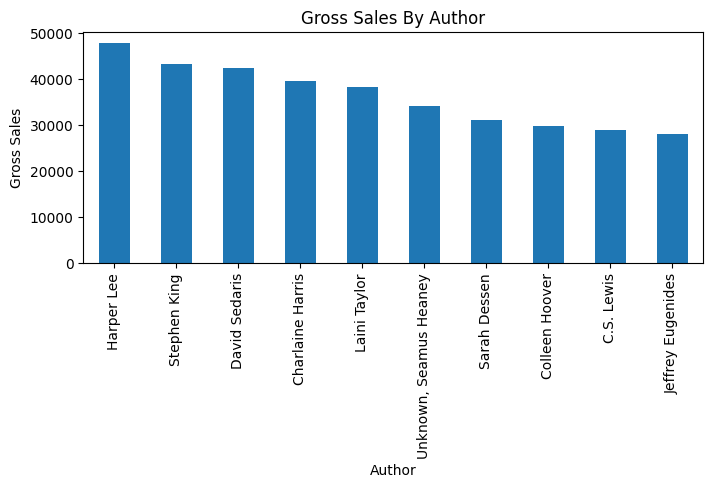

In [170]:
#sales by author
tot_SBA = df.groupby('Author')['Gross_Sales'].sum()
tot_SBA.sort_values(ascending=False).head(10).plot(kind= 'bar',figsize=(8,3))
plt.title('Gross Sales By Author')
plt.xlabel('Author')
plt.ylabel('Gross Sales')
plt.show()

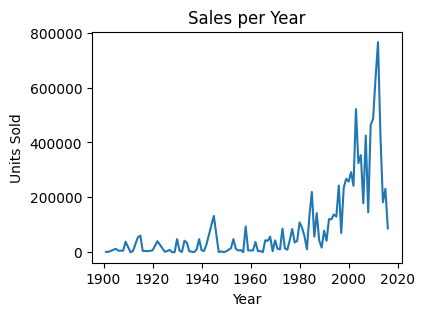

In [180]:
#books sold in each year
df.groupby('Publishing_Year')['Units_Sold'].sum().plot(kind='line', figsize=(4,3))
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()
#insights: Book sales increased exponentially over the past few years